# Hackathon - E-Commerce Forecasting For Sales

### Data Description
The dataset for this hackathon includes:

train.csv: Contains historical sales data at levels of categories and brands.

test.csv: Contains data for testing.

submission.csv: The format in which your predictions should be submitted.

### How to Crack This Challenge
To tackle this challenge successfully, follow these steps:

### Data Pre-processing

Handle Missing Values: Identify and impute or remove missing values.

Normalize/Scale Numerical Data: Standardize numerical features to improve model performance.

### Model Development

Use machine learning models like Random Forest and XGBoost for demand forecasting.

Implement LSTM (Long Short-Term Memory) for capturing time-series dependencies.
Utilize LightGBM for efficient and fast gradient boosting.

### Training and Optimization

Apply Grid Search or Random Search for hyperparameter tuning.

Train models using historical data to capture trends, seasonality, and sales patterns.

Use cross-validation to assess model performance and avoid overfitting.

### Validation and Testing

Ensure the model generalizes well to unseen data.

Generate predictions for the test dataset in the required format for submission.

## Importing necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import statsmodels.api as sm

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# import matplotlib.pyplot as plt
# %matplotlib inline

# import seaborn as sns
# sns.set()

# import pandas as pd
# import numpy as np

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import xgboost as xgb
# import lightgbm as lgb
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hackathon/Forecasting For Sales/Train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hackathon/Forecasting For Sales/Test.csv')

## Data Overview

**Loading the dataset**

In [4]:
df.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,26/09/24,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0
1,26/09/24,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0
2,26/09/24,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0
3,26/09/24,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0
4,22/09/24,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0


**Shape of the dataset**

In [5]:
df.shape

(18483, 10)

**Info regarding column datatypes**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18483 non-null  object 
 1   Category              18483 non-null  object 
 2   Brand                 18483 non-null  object 
 3   Day_of_Week           18483 non-null  int64  
 4   Holiday_Indicator     18483 non-null  int64  
 5   Past_Purchase_Trends  18483 non-null  float64
 6   Price                 18483 non-null  float64
 7   Discount              18483 non-null  float64
 8   Competitor_Price      18483 non-null  float64
 9   Sales_Quantity        18019 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB


**Statistics summary for the numerical columns**

In [7]:
df.describe()

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18019.000000
mean,2.991235,0.142022,52.329465,275.111184,27.490937,259.858758,255.665631
std,2.000765,0.349083,27.410577,129.733609,13.022521,126.653165,141.179795
min,0.000000,0.000000,5.000000,50.070000,5.000000,40.070000,10.000000
25%,1.000000,0.000000,28.900000,163.315000,16.265000,149.530000,133.500000
50%,3.000000,0.000000,52.500000,275.150000,27.600000,260.260000,257.000000
75%,5.000000,0.000000,75.700000,387.650000,38.690000,368.520000,377.000000
max,6.000000,1.000000,100.000000,499.900000,49.990000,479.990000,499.000000


**Checking missing values**

In [8]:
df.isnull().sum()

,0
Date,0
Category,0
Brand,0
Day_of_Week,0
Holiday_Indicator,0
Past_Purchase_Trends,0
Price,0
Discount,0
Competitor_Price,0
Sales_Quantity,464


## Data Overview - Test

In [9]:
df_test.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,15/12/24,Automotive,BrandA,6.0,1.0,48.8,150.23,43.58,302.39,NaN
1,15/12/24,Automotive,BrandA,6.0,1.0,79.2,344.84,15.17,322.33,NaN
2,07/12/24,Automotive,BrandA,5.0,0.0,56.2,459.79,24.89,92.22,NaN
3,07/12/24,Automotive,BrandA,5.0,0.0,78.0,117.05,31.89,100.16,NaN
4,03/12/24,Automotive,BrandA,1.0,0.0,36.3,408.92,28.48,442.54,NaN


In [10]:
df_test.shape

(1080, 10)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1052 non-null   object 
 1   Category              1052 non-null   object 
 2   Brand                 1052 non-null   object 
 3   Day_of_Week           1052 non-null   float64
 4   Holiday_Indicator     1052 non-null   float64
 5   Past_Purchase_Trends  1052 non-null   float64
 6   Price                 1052 non-null   float64
 7   Discount              1052 non-null   float64
 8   Competitor_Price      1052 non-null   float64
 9   Sales_Quantity        0 non-null      float64
dtypes: float64(7), object(3)
memory usage: 84.5+ KB


In [12]:
df_test.isnull().sum()

,0
Date,28
Category,28
Brand,28
Day_of_Week,28
Holiday_Indicator,28
Past_Purchase_Trends,28
Price,28
Discount,28
Competitor_Price,28
Sales_Quantity,1080


In [13]:
# df_test = df_test.drop(columns=["Sales_Quantity"])
# df_test = df_test.dropna()

In [14]:
df_test.isnull().sum()

,0
Date,28
Category,28
Brand,28
Day_of_Week,28
Holiday_Indicator,28
Past_Purchase_Trends,28
Price,28
Discount,28
Competitor_Price,28
Sales_Quantity,1080


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1052 non-null   object 
 1   Category              1052 non-null   object 
 2   Brand                 1052 non-null   object 
 3   Day_of_Week           1052 non-null   float64
 4   Holiday_Indicator     1052 non-null   float64
 5   Past_Purchase_Trends  1052 non-null   float64
 6   Price                 1052 non-null   float64
 7   Discount              1052 non-null   float64
 8   Competitor_Price      1052 non-null   float64
 9   Sales_Quantity        0 non-null      float64
dtypes: float64(7), object(3)
memory usage: 84.5+ KB


**Check for duplicates in the dataset**

In [16]:
print("There are",df.duplicated().sum(),"duplicated rows")

There are 0 duplicated rows


## Exploratory Data Analysis (EDA)

**Category**

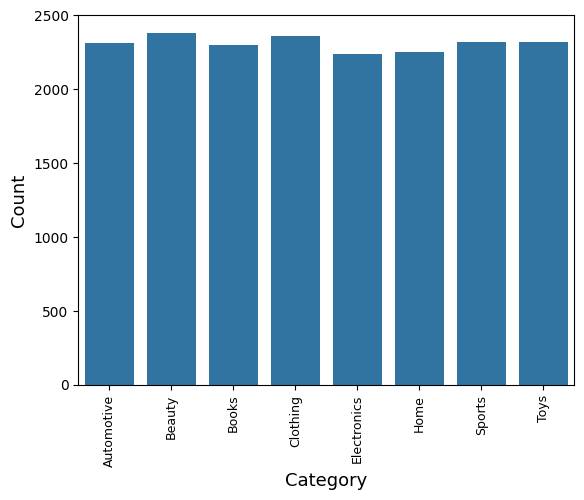

In [17]:
chart = sns.countplot(data=df,x='Category')
chart.set_xlabel('Category', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.xticks(rotation=90,fontsize=9)
plt.show()

**Brand**

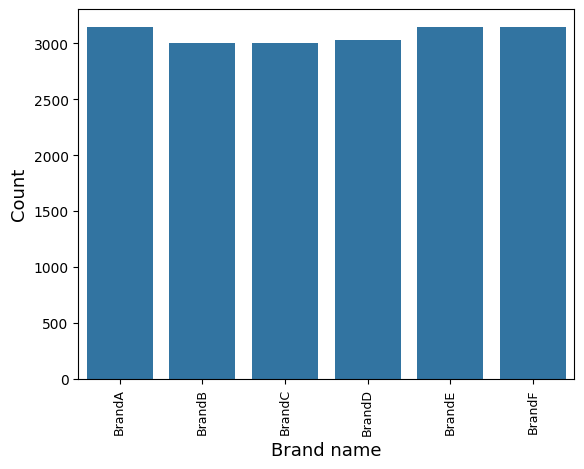

In [18]:
chart = sns.countplot(data=df,x='Brand')
chart.set_xlabel('Brand name', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.xticks(rotation=90,fontsize=9)
plt.show()

#### Bivariate Analysis

**Correlation analysis**

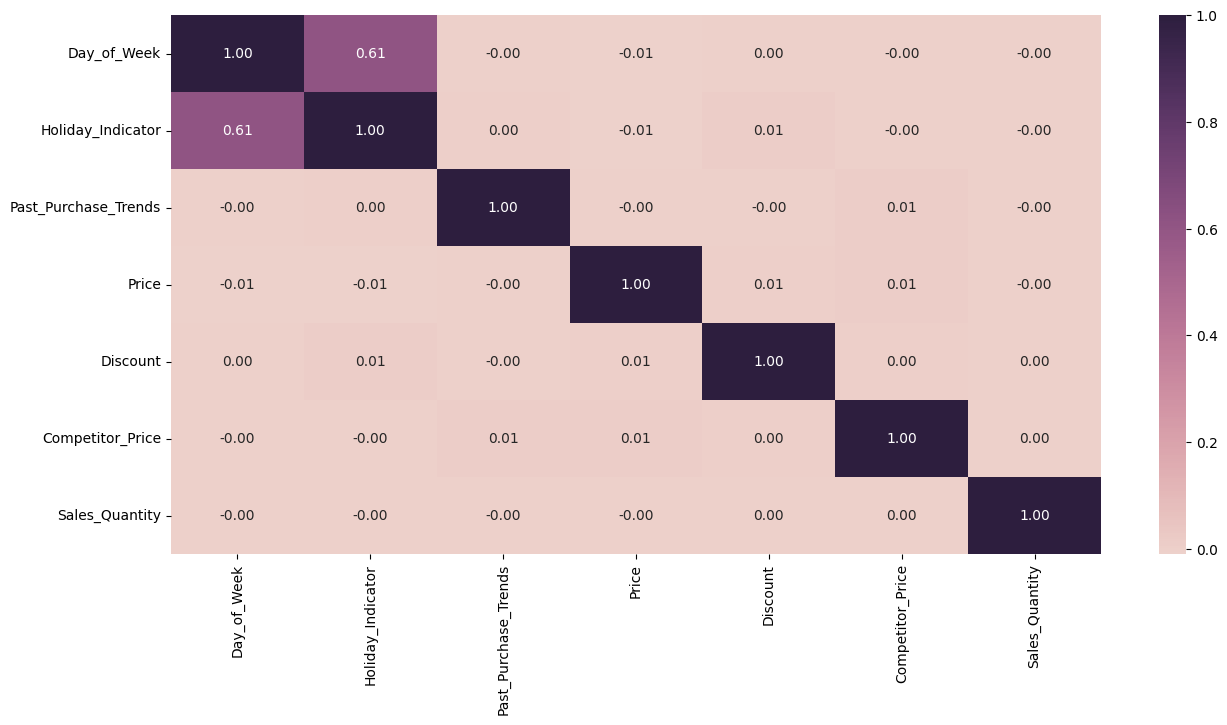

In [19]:
data = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(df[data].corr(), annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

**Brand vs Category**

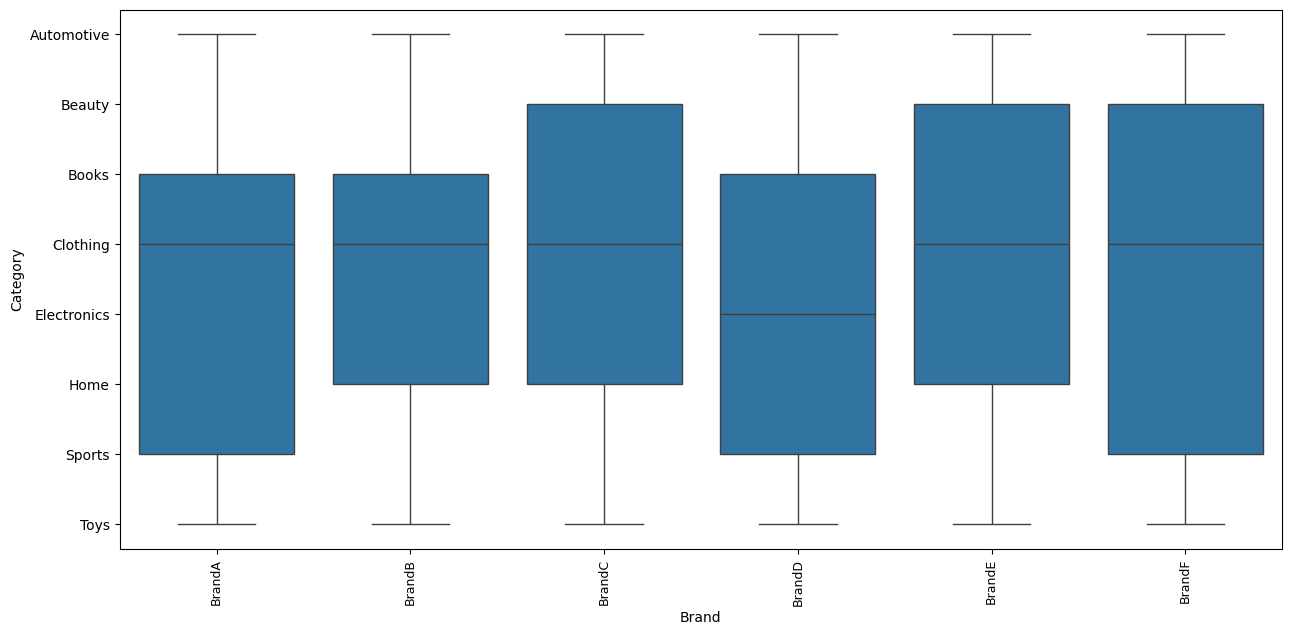

In [20]:
plt.figure(figsize=(15, 7))

sns.boxplot(data=df, x="Brand", y="Category")
plt.xticks(rotation=90,fontsize=9)
plt.show()

## Data Preprocessing

**Copy data**

In [21]:
dfCopy = df.copy()

**Missing value treatment**

In [22]:
dfCopy.isnull().sum()

,0
Date,0
Category,0
Brand,0
Day_of_Week,0
Holiday_Indicator,0
Past_Purchase_Trends,0
Price,0
Discount,0
Competitor_Price,0
Sales_Quantity,464


**Preparing data for modeling**

In [23]:
def preprocess_data(df, is_train=True):
    # Handle missing values
    df = df.fillna(df.median(numeric_only=True))

    # Encode categorical variables
    df = pd.get_dummies(df, drop_first=True)
    return df

In [24]:
# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['PriceDiff'] = df['Price'] - df['Competitor_Price']
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek
df_test['Month'] = df_test['Date'].dt.month
df_test['IsWeekend'] = df_test['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df_test['PriceDiff'] = df_test['Price'] - df_test['Competitor_Price']
df.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)

# Handle missing values
df['Sales_Quantity'].fillna(df['Sales_Quantity'].median(), inplace=True)

# Encode categorical variables
encoder = OrdinalEncoder()
df[['Category', 'Brand']] = encoder.fit_transform(df[['Category', 'Brand']])

df_test = df_test.drop(columns=["Sales_Quantity"])
df_test = df_test.dropna()
df_test[['Category', 'Brand']] = encoder.transform(df_test[['Category', 'Brand']])

# Split data
X = df.drop(columns=['Sales_Quantity'])
y = df['Sales_Quantity']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-24-b7f64818140a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-24-b7f64818140a>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Date'] = pd.to_datetime(df_test['Date'])
<ipython-input-24-b7f64818140a>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].me

In [25]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
df_test_scaled = scaler.transform(df_test)


In [26]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf.best_estimator_.predict(X_val)))
print(f'RF RMSE: {rf_rmse}')

RF RMSE: 140.73595844230235


In [27]:
import xgboost as xgb
# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.01],
    'max_depth': [3, 6],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.2, 0.3]
}
xgb = RandomizedSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), xgb_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb.best_estimator_.predict(X_val)))
print(f'XGB RMSE: {xgb_rmse}')

XGB RMSE: 140.38479267175686


In [28]:
# LightGBM
lgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.01, 0.01],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.2, 0.3, 0.5]
}
lgb = RandomizedSearchCV(lgb.LGBMRegressor(random_state=42), lgb_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
lgb.fit(X_train, y_train)
lgb_rmse = np.sqrt(mean_squared_error(y_val, lgb.best_estimator_.predict(X_val)))
print(f'LGBM RMSE: {lgb_rmse}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 14786, number of used features: 12
[LightGBM] [Info] Start training from score 255.949885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [46]:
# Create sequences for LSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7  # Use 7-day sequences
X_seq, y_seq = create_sequences(X_train, y.values, seq_length)
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

lstm = Sequential()

# First LSTM Layer (Bidirectional)
lstm.add(Bidirectional(LSTM(512, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))))
lstm.add(Dropout(0.2))
lstm.add(BatchNormalization())

# Second LSTM Layer
lstm.add(LSTM(256, return_sequences=False))
lstm.add(Dropout(0.1))

# Dense Output Layers
lstm.add(Dense(128, activation='relu'))
lstm.add(Dense(1))

lstm.compile(optimizer='adam', loss='mse')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Training
history = lstm.fit(X_train_seq, y_train_seq, epochs=8, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

lstm_rmse = np.sqrt(mean_squared_error(y_val_seq, lstm.predict(X_val_seq).flatten()))
print(f'LSTM RMSE: {lstm_rmse}')

# Prepare test data for LSTM
X_test_seq = []
for i in range(len(df_test_scaled) - seq_length + 1):
    X_test_seq.append(df_test_scaled[i:i + seq_length])
X_test_seq = np.array(X_test_seq)

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 76s 462ms/step - loss: 52760.5781 - val_loss: 19328.8027 - learning_rate: 0.0010
Epoch 2/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 78s 439ms/step - loss: 19402.4375 - val_loss: 19298.5762 - learning_rate: 0.0010
Epoch 3/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 67s 451ms/step - loss: 19276.3398 - val_loss: 19320.3555 - learning_rate: 0.0010
Epoch 4/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 435ms/step - loss: 19298.2422 - val_loss: 19324.1172 - learning_rate: 0.0010
Epoch 5/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 85s 452ms/step - loss: 19643.4746 - val_loss: 19339.8496 - learning_rate: 0.0010
Epoch 6/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 79s 437ms/step - loss: 19651.9941 - val_loss: 19311.5332 - learning_rate: 0.0010
Epoch 7/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 68s 456ms/step - loss: 19711.9980 - val_loss: 19325.7500 - learning_rate: 0.0010
Epoch 8/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 81s 448ms/step - loss: 19375.9258 - val_loss: 19313.1191 - learning_rate: 5.0000e-04
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step
LSTM R

In [47]:
# Select best model based on RMSE
rmse_scores = {'RF': rf_rmse, 'XGB': xgb_rmse, 'LGBM': lgb_rmse, 'LSTM': lstm_rmse}
best_model = max(rmse_scores, key=rmse_scores.get)

# Predict on test set
# if best_model == 'LSTM':
#     final_pred = lstm.predict(X_test_seq).flatten()
#     final_pred = np.pad(final_pred, (0, len(df_test) - len(final_pred)), mode='edge')  # Adjust length
# else:
# model_dict = {'RF': rf.best_estimator_, 'XGB': xgb.best_estimator_, 'LGBM': lgb.best_estimator_}
# final_pred = model_dict[best_model].predict(df_test_scaled)

# better = 0
# final_pred = None
# if best_model == rf_rmse:
#   final_pred = rf.best_estimator_.predict(df_test_scaled)
#   better = 1
# elif best_model == xgb_rmse:
#   final_pred = xgb.best_estimator_.predict(df_test_scaled)
#   better = 2
# elif best_model == lgb_rmse:
#   final_pred = lgb.best_estimator_.predict(df_test_scaled)
#   better = 3
# else:
#   final_pred = lstm.predict(X_test_seq).flatten()
#   final_pred = np.pad(final_pred, (0, len(df_test) - len(final_pred)), mode='edge')  # Adjust length
#   better = 4
print({'rf_rmse': rf_rmse})
print({'xgb_rmse': xgb_rmse})
print({'lgb_rmse': lgb_rmse})
print({'lstm_rmse': lstm_rmse})

final_pred = None
#final_pred = rf.best_estimator_.predict(df_test_scaled)
#final_pred = xgb.best_estimator_.predict(df_test_scaled)
#final_pred = lgb.best_estimator_.predict(df_test_scaled)
final_pred = lstm.predict(X_test_seq).flatten()
final_pred = np.pad(final_pred, (0, len(df_test) - len(final_pred)), mode='edge')  # Adjust length

# Submission
submission = pd.DataFrame({'Sales_Quantity': final_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Hackathon/Forecasting For Sales/Submission.csv', index=False)
print('Submission file generated!')
submission

{'rf_rmse': 140.73595844230235}
{'xgb_rmse': 140.38479267175686}
{'lgb_rmse': 140.41582964856224}
{'lstm_rmse': 140.32838759543736}
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
Submission file generated!


,Sales_Quantity
0,253.792236
1,254.098114
2,256.471649
3,256.303406
4,258.407196
...,...
1047,257.330048
1048,257.330048
1049,257.330048
1050,257.330048


In [31]:
# # Generate submission
# test_processed_lstm = test_processed.reshape((test_processed.shape[0], 1, test_processed.shape[1]))

# rf_test_pred = rf_best.predict(test_processed)
# xgb_test_pred = xgb_best.predict(test_processed)
# lgb_test_pred = lgb_best.predict(test_processed)
# lstm_test_pred = lstm_model.predict(test_processed_lstm).flatten()

# # Ensemble prediction - use the best model
# final_pred = None
# if max(sqrtRandomForest, sqrtXGBoost, sqrtLightGBM, sqrtLightRMSE) == sqrtRandomForest:
#   final_pred = rf_test_pred
# elif max(sqrtRandomForest, sqrtXGBoost, sqrtLightGBM, sqrtLightRMSE) == sqrtXGBoost:
#   final_pred = xgb_test_pred
# elif max(sqrtRandomForest, sqrtXGBoost, sqrtLightGBM, sqrtLightRMSE) == sqrtLightGBM:
#   final_pred = lgb_test_pred
# else:
#   final_pred = lstm_test_pred

# #final_pred = lstm_test_pred

# # Create submission
# submission = pd.DataFrame({
#     'Sales_Quantity': final_pred  # Adjust 'sales' to match submission requirements
# })
# submission.to_csv('/content/drive/My Drive/Colab Notebooks/Hackathon/Forecasting For Sales/Submission.csv', index=False)
# print('Submission file generated!')
# submission
# #print(rf_test_pred)